# TF-IDF

In [93]:
import pickle
import os
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tfidf_utils import clean_wikipedia_text, process_text, compute_tf_idf
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [94]:
# Load the graph and partition
S = pickle.load(open("graph.pkl", "rb"))
subfields_partition = pickle.load(open("subfields_partition.pkl", "rb"))

In [95]:
TEXT_DIR = "downloads"

# Compile and clean texts for all subfields
def compile_and_clean_all_subfields(partition, text_dir):
    subfield_texts = {}

    for subfield in set(partition.values()):
        compiled_text = ""
        # Find all philosophers in this subfield
        philosophers = [node for node, sf in partition.items() if sf == subfield]
        
        for philosopher in philosophers:
            filename = os.path.join(text_dir, f"{philosopher}.txt")
            if os.path.exists(filename):
                with open(filename, "r", encoding="utf-8") as file:
                    text = file.read()
                    compiled_text += text + "\n"
            else:
                print(f"Warning: File not found for philosopher {philosopher}")
        
        # Clean compiled text
        subfield_texts[subfield] = clean_wikipedia_text(compiled_text)

    return subfield_texts

# Load partition and generate cleaned texts

subfield_texts = compile_and_clean_all_subfields(subfields_partition, TEXT_DIR)
print(f"Compiled and cleaned text for {len(subfield_texts)} subfields.")

Compiled and cleaned text for 19 subfields.


Process text and count words.

In [96]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [97]:
# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Process text and count word frequencies for all subfields
word_counts_by_subfield = {}

for subfield, text in subfield_texts.items():
    word_counts_by_subfield[subfield] = process_text(text, stop_words, lemmatizer)

# # Display top 15 words for each subfield
# for subfield, word_counts in word_counts_by_subfield.items():
#     print(f"\nTop 15 words for subfield '{subfield}':")
#     top_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:15]
#     for word, count in top_words:
#         print(f"{word}: {count}")

In [98]:
# Compute TF-IDF for all subfields
tf_idf_scores = compute_tf_idf(word_counts_by_subfield)

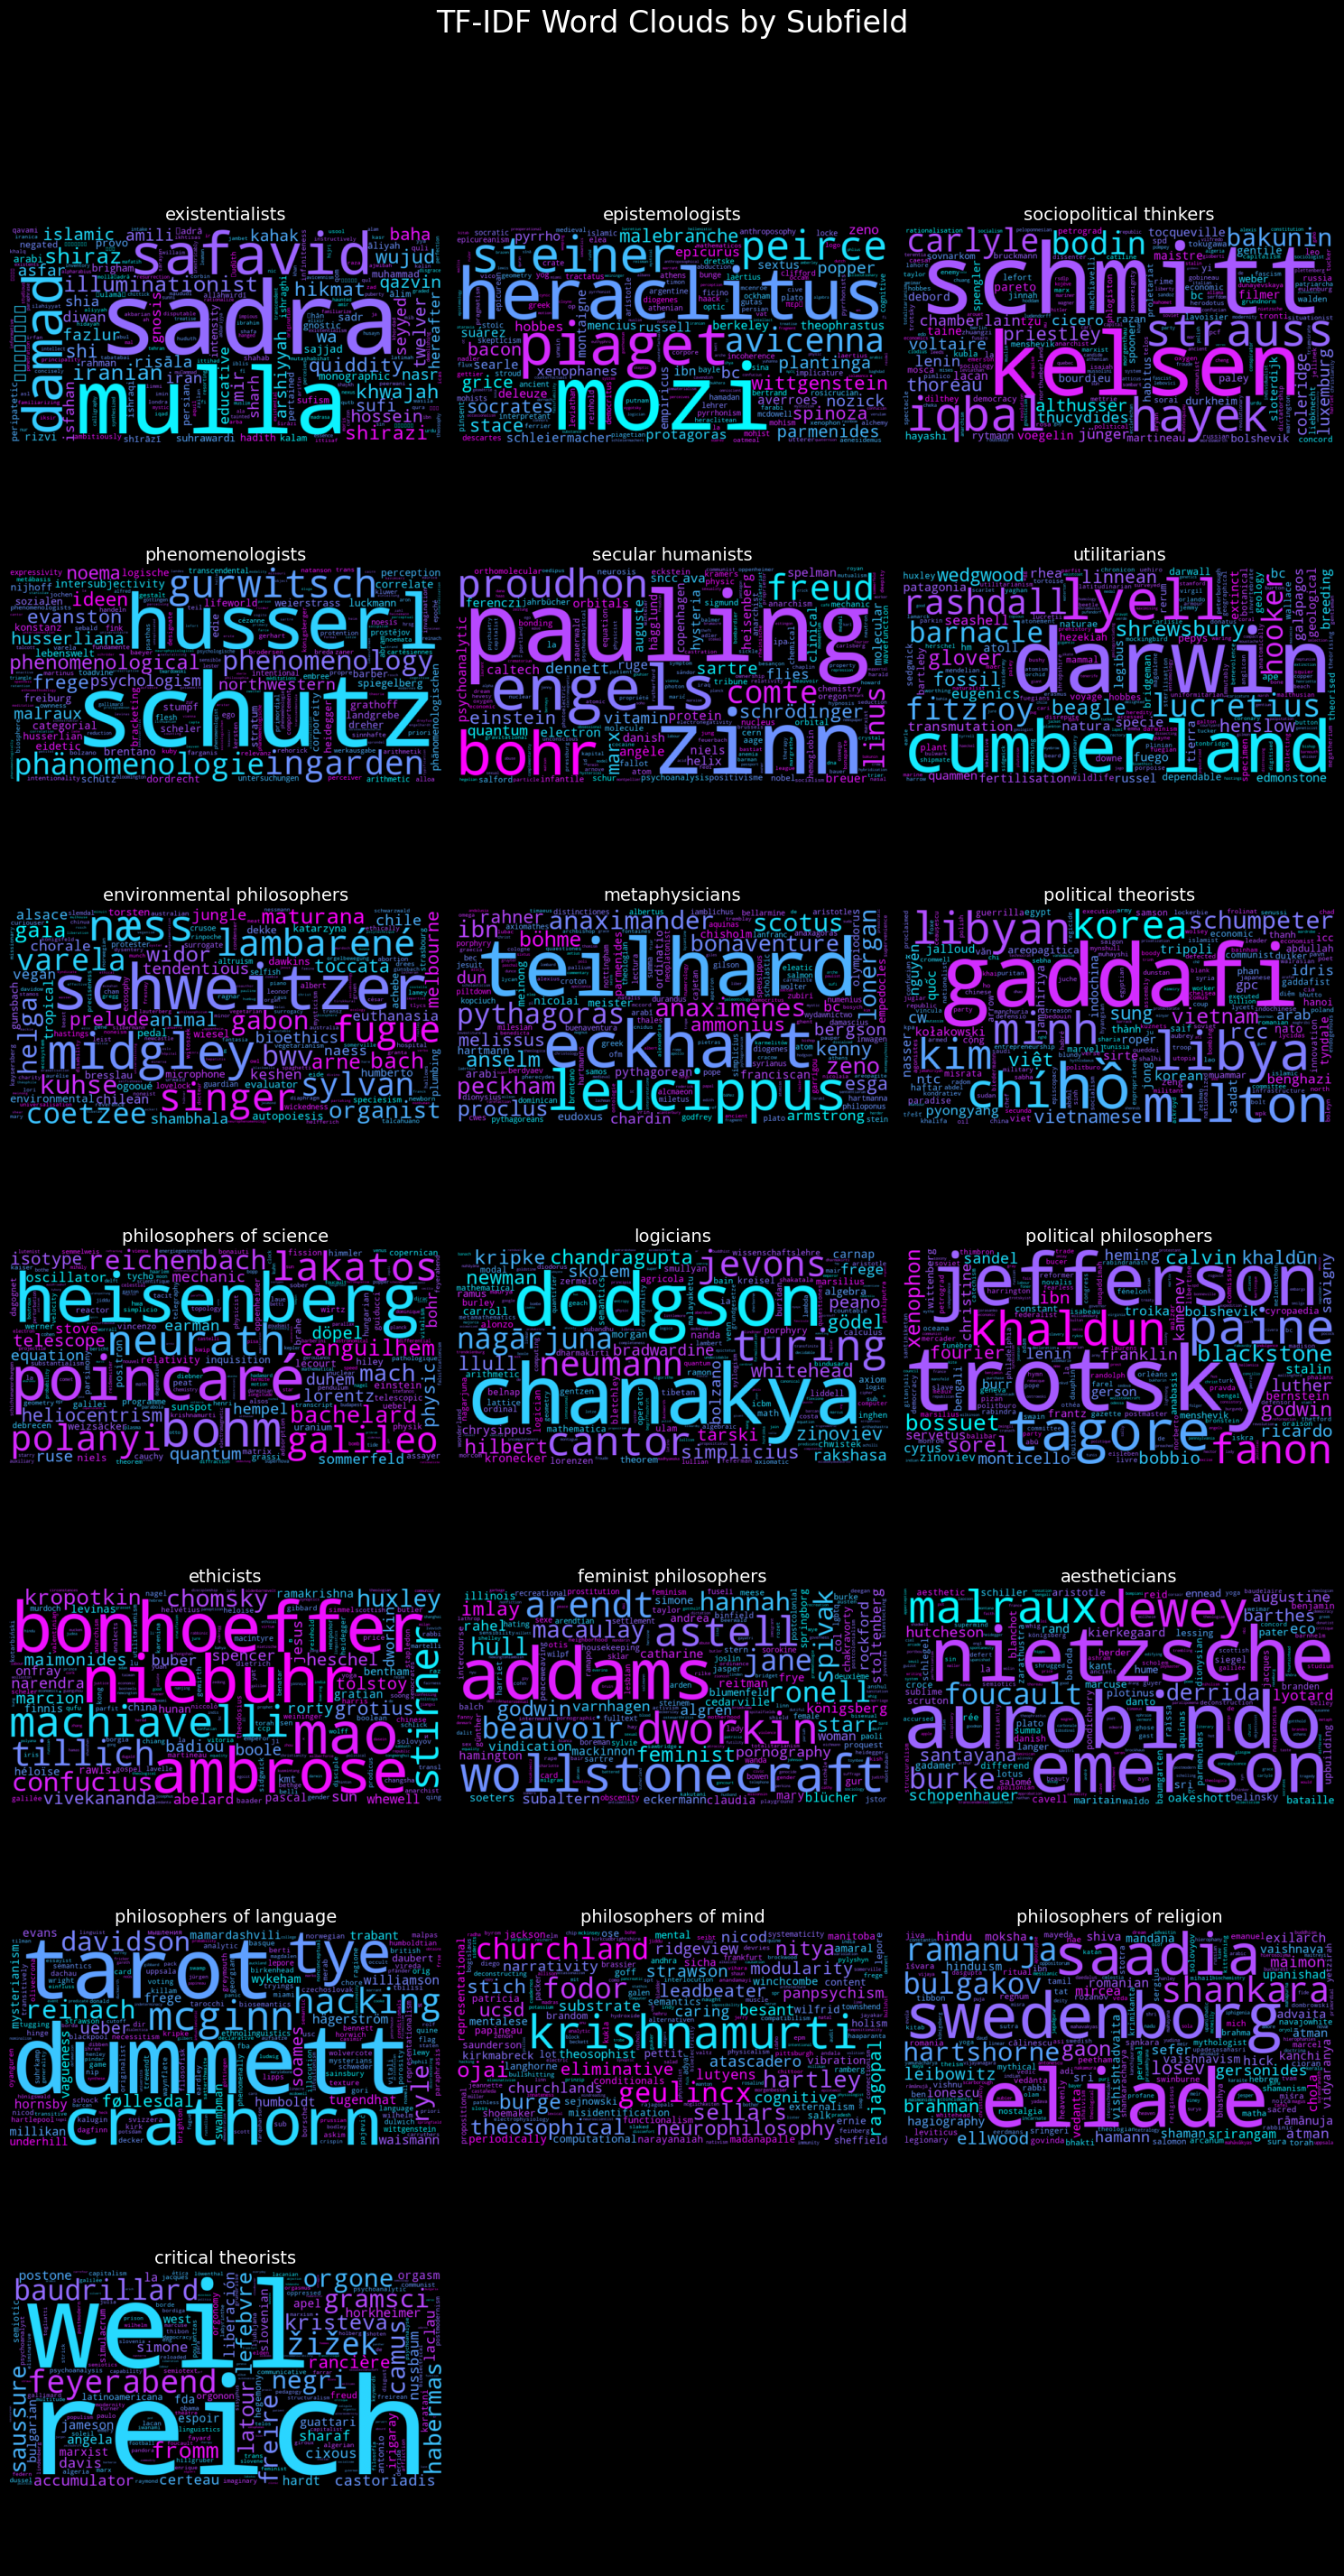

In [99]:
# Define the number of rows and columns for the subplot grid
rows, cols = 7, 3 
fig, axes = plt.subplots(rows, cols, figsize=(15, 30))
fig.patch.set_facecolor('black')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over subfields and their corresponding TF-IDF scores
for i, (subfield, tf_idf) in enumerate(tf_idf_scores.items()):
    # Stop after filling up the grid
    if i >= rows * cols:
        break

    # Create the word cloud object
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap="cool",
        contour_width=2,
        contour_color='blue',
        collocations=False,
    ).generate_from_frequencies(tf_idf)

    # Display the word cloud in the subplot
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"{subfield}", fontsize=14, color='white')

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

fig.suptitle("TF-IDF Word Clouds by Subfield", fontsize=24, color='white')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


**Subfield partition**:  

The TF-IDF analysis of subfields revealed key terms and figures that define each philosophical domain. Here are the most significant observations:

* **Existentialists**: the word cloud highlights figures such as Mulla Sadra, Safavid, and Iranian, which indicate a strong focus on Iranian Islamic existential philosophy. This suggests that the existentialist tradition encompasses global perspectives beyond its typical Western focus.

* **Epistemologists**: the names Heraclitus, Peirce, Mozi, and Avicenna stand out, reflecting the field's historical depth and its ties to both Western and Eastern philosophical traditions. This diversity emphasizes epistemology's universal nature in exploring the foundations of knowledge.

* **Sociopolitical Thinkers**: words like Schmitt, Kelsen, and Hayek show an emphasis on modern political and legal thought, while Iqbal introduces an Islamic philosophical perspective, highlighting the global reach of this subfield.

* **Phenomenologists**: figures such as Husserl, Schutz, and Gurwitsch dominate, reinforcing the influence of German and Austrian phenomenology in shaping the field.

* **Philosophers of Science**: Heisenberg, Lakatos, and Poincaré illustrate the strong overlap between philosophy and scientific methodology. This highlights how philosophers have shaped the conceptual foundations of modern science.

* **Environmental Philosophers**: prominent names such as Schweitzer, Naess, and Midgley underscore the ethical and ecological concerns that define this subfield, reflecting its relevance in contemporary global challenges.

* **Political Philosophers**: names like Jefferson, Trotsky, and Tagore show the breadth of this subfield, connecting historical revolutionary movements with contemporary political thought.

* **Feminist Philosophers**: the presence of Wollstonecraft, de Beauvoir, and Dworkin emphasizes the foundational contributions of feminist thinkers in addressing issues of gender, equality, and social justice.

And now the *louvain_partition_subfields*.

Compiled and cleaned text for 10 Louvain communities.


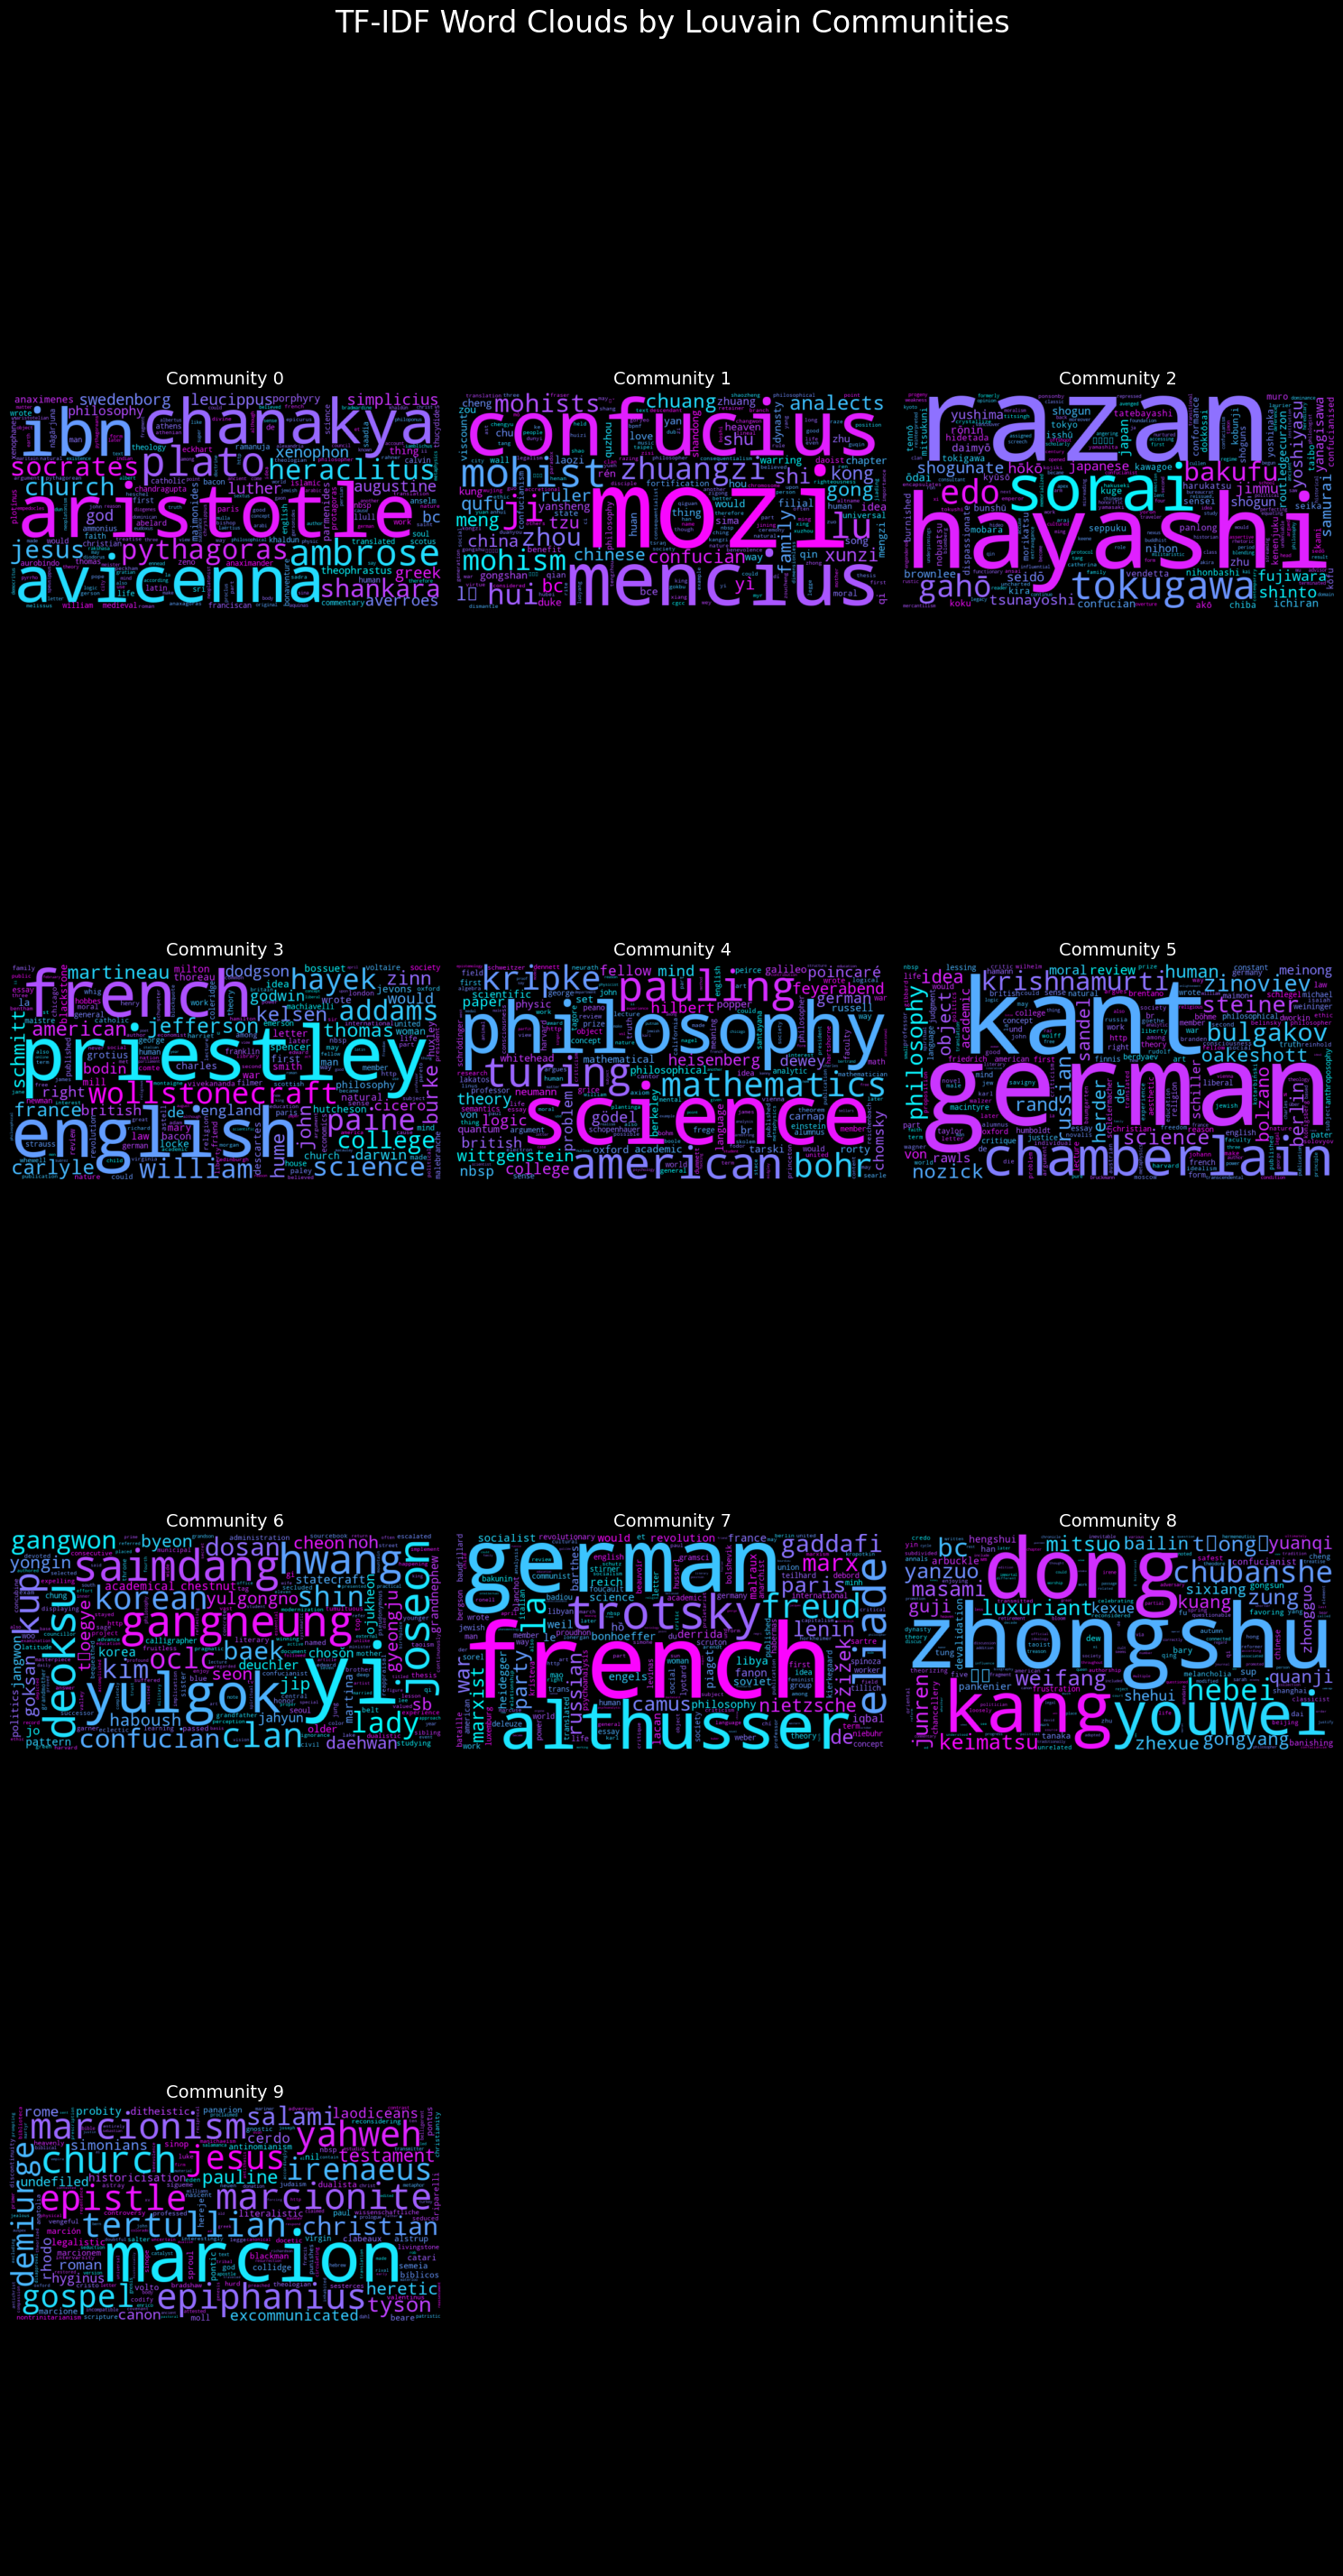

In [106]:
louvain_partition_subfields = pickle.load(open("louvain_partition_subfields.pkl", "rb"))

louvain_subfield_texts = compile_and_clean_all_subfields(louvain_partition_subfields, TEXT_DIR)
print(f"Compiled and cleaned text for {len(louvain_subfield_texts)} Louvain communities.")

# Process text and count word frequencies for all Louvain communities
word_counts_by_louvain_subfield = {}

for community, text in louvain_subfield_texts.items():
    word_counts_by_louvain_subfield[community] = process_text(text, stop_words, lemmatizer)

# Compute TF-IDF for all Louvain communities
tf_idf_scores_louvain = compute_tf_idf(word_counts_by_louvain_subfield)

# Define the number of rows and columns for the subplot grid
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 30))
fig.patch.set_facecolor('black')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over Louvain communities and their corresponding TF-IDF scores
for i, (community, tf_idf) in enumerate(tf_idf_scores_louvain.items()):
    # Stop after filling up the grid
    if i >= rows * cols:
        break

    # Create the word cloud object
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap="cool",
        contour_width=2,
        contour_color='blue',
        collocations=False,
    ).generate_from_frequencies(tf_idf)

    # Display the word cloud in the subplot
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"Community {community}", fontsize=14, color='white')

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

fig.suptitle("TF-IDF Word Clouds by Louvain Communities", fontsize=24, color='white')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Louvain partition**

The Louvain algorithm, which groups philosophers based on textual similarity and network structure, reveals communities that transcend traditional subfield divisions:

* **Community 0**: names like Aristotle, Socrates, Plato, and Avicenna dominate, forming a foundational community focused on classical Western and Islamic philosophy. This reflects the central influence of early philosophical traditions.

* **Community 1**: this community centers around Chinese philosophy, featuring terms like Confucius, Mozi, and Zhuangzi. The clustering emphasizes a distinct Eastern philosophical tradition.

* **Community 2**: words like Razan and Tokugawa point to Japanese Confucian thought during the Edo period, which represents a unique philosophical development in East Asia.

* **Community 4**: focused on the philosophy of science, this cluster includes figures like Turing, Bohr, and Kripke. It highlights interdisciplinary connections between philosophy, mathematics, and physics.

* **Community 7**: featuring names like Trotsky, Althusser, and Eliade, this community bridges political philosophy, Marxism, and religious studies, reflecting interdisciplinary and geopolitical intersections.

* **Community 9**: centered on early Christian thinkers such as Marcion and Tertullian, this cluster highlights theological debates that influenced Western philosophy and religious thought.

The subfields partition follows predefined categorizations, making it easier to study traditional distinctions in philosophy. Louvain communities, on the other hand, highlight unexpected interdisciplinary connections and regional groupings, such as the clustering of Japanese Confucian thinkers or the overlap between Marxist and religious thought.

The Louvain partition uncovers distinct regional clusters, such as the Chinese and Japanese philosophical traditions, which are less evident in subfield divisions. Subfields like epistemology and existentialism also highlight a mix of Western and non-Western figures, suggesting the increasing recognition of global contributions.


The analysis demonstrates the diversity of philosophical traditions, from the ecological focus of environmental philosophers to the interdisciplinary nature of the philosophy of science. Louvain communities reinforce this diversity, showcasing both shared themes (e.g., political philosophy) and unique regional perspectives.